Brain vs. Body Weight
In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Tasks
Find the linear regression equation for this data for brain weight to body weight.
Chart the original data and the equation on the chart.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.shape


(62, 2)

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
#IQR FINDINGS
percentile25=df['Brain'].quantile(0.25)
percentile75=df['Brain'].quantile(0.75)
iqr=percentile75-percentile25
print("IQR= ",iqr)
print("percentile25=",percentile25)
print("percentile75=",percentile75)

IQR=  47.6025
percentile25= 0.6000000000000001
percentile75= 48.2025


In [ ]:
upper=percentile75+(1.5*iqr)
lower=percentile25-(1.5*iqr)
print("upperlimit",upper)
print("lowerlimit",lower)

upperlimit 119.60625
lowerlimit -70.80375000000001


In [ ]:
df["Brain"] = np.where(df["Brain"] >119, 119,df['Brain'])
df["Brain"] = np.where(df["Brain"] <-70, -70,df['Brain'])


In [ ]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,119.000,423.0
4,36.330,119.5
...,...,...
57,119.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
percentile_25=df['Body'].quantile(0.25)
percentile_75=df['Body'].quantile(0.75)
iqr=percentile_75-percentile_25
print("IQR= ",iqr)
print("percentile25=",percentile_25)
print("percentile75=",percentile_75)

IQR=  161.75
percentile25= 4.25
percentile75= 166.0


In [ ]:
upper=percentile_75+(1.5*iqr)
lower=percentile_25-(1.5*iqr)
print("upperlimit",upper)
print("lowerlimit",lower)

upperlimit 408.625
lowerlimit -238.375


In [ ]:
df["Body"] = np.where(df["Body"] >408, 408,df['Body'])
df["Body"] = np.where(df["Body"] <-238, -238,df['Body'])

In [ ]:
x = df.loc[:, ['Brain']].values
y = df.loc[:, 'Body'].values 

print(x.shape)


print(y.shape)

(62, 1)
(62,)


In [ ]:
linreg = linear_model.LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [ ]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 19.392502583358663
coefficient: [2.92975005]


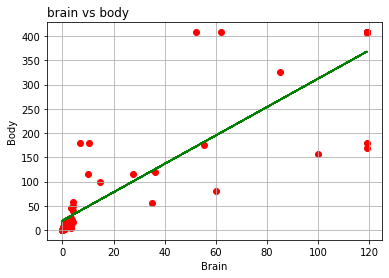

In [ ]:
plt.scatter(x, y, color='red')
plt.plot(x, linreg.predict(x), color='green')
plt.xlabel("Brain")
plt.ylabel("Body")
plt.title("brain vs body",loc='left')
plt.grid()
plt.show()

In [ ]:
print('r-squared: ', linreg.score(x, y))

r-squared:  0.789292819679301
